In [12]:
import json
import collections
import matplotlib.pyplot as plt
from math import sqrt

### Load the data:

In [15]:
route_file = "basic_route.geojson"
notram_route_file = "visualization/data/bike_buddy_notram.geojson"
illumination_route_file = "visualization/data/bike_buddy_illumination.geojson"
illumination_file = "data/illuminated_area_geogr.geojson"
tram_file = "data/tram_area_geogr.geojson"
fastest_route_file = "data/bike_buddy_fastest.geojson"
shortest_route_file = "data/bike_buddy_shortest.geojson"

In [17]:
#Load the routes (first the dummy for for sanity-checking, then our four interesting ones:
#No Tram, Maximal Illumination, Fastest, Shortest)
with open(route_file) as route_in:
    route_json = json.loads(route_in.read())
with open(notram_route_file, encoding="utf-8-sig") as notram_route_in:
    notram_route_json = json.loads(notram_route_in.read())
    notram_route_json = notram_route_json['geometry']
with open(illumination_route_file, encoding="utf-8-sig") as illumination_route_in:
    illumination_route_json = json.loads(illumination_route_in.read())
    illumination_route_json = illumination_route_json['geometry']
with open(fastest_route_file, encoding="utf-8-sig") as fastest_route_in:
    fastest_route_json = json.loads(fastest_route_in.read())
    fastest_route_json = fastest_route_json['geometry']
with open(shortest_route_file, encoding="utf-8-sig") as shortest_route_in:
    shortest_route_json = json.loads(shortest_route_in.read())
    shortest_route_json = shortest_route_json['geometry']
    
#Load the data on Illumination and Tram    
with open(illumination_file) as illumination_in:
    illumination_json = json.loads(illumination_in.read())
with open(tram_file) as tram_in:
    tram_json = json.loads(tram_in.read())

### Let's extract the Illumination coordinates first:

In [18]:
#Extract coordinates
polygon_list = [feature['geometry']['coordinates'] for feature in illumination_json['features']]

In [19]:
#This list has a weird structure, flatten it
def flatten(l):
    for el in l:
        if isinstance(el, collections.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el
illumination_flattened_coordinates = list(flatten(polygon_list))
illumination_coordinates = list(zip(illumination_flattened_coordinates[::2], illumination_flattened_coordinates[1::2]))

In [20]:
illumination_coordinates

[(8.64230382078778, 49.361360468436295),
 (8.641964155820375, 49.361289664016844),
 (8.641725763739846, 49.36123474084224),
 (8.641666885057347, 49.36121148626029),
 (8.64154717225541, 49.361179638947895),
 (8.641418251149071, 49.36117351238875),
 (8.641292741238201, 49.36119370628339),
 (8.641182928131283, 49.36123824394214),
 (8.641099561011702, 49.36130276576606),
 (8.641050800466655, 49.361380955972855),
 (8.64104141965951, 49.36146516080557),
 (8.641072337045303, 49.361547137718226),
 (8.641140526390975, 49.36161886221001),
 (8.6412393129369, 49.361673313330506),
 (8.641334513217775, 49.36171091350569),
 (8.641410862819662, 49.361734481091176),
 (8.64169516410058, 49.361799981429236),
 (8.641706981400997, 49.36180257375297),
 (8.642087883179917, 49.361881974167424),
 (8.64212856500024, 49.361888985567376),
 (8.64223716555529, 49.361903885647756),
 (8.642364838592096, 49.36190820159045),
 (8.642454639075916, 49.36190210155865),
 (8.642610382975445, 49.36187037000723),
 (8.642690883

### Now extract the Tram coordinates: 

In [21]:
#Extract coordinates
tram_polygon_list = [feature['geometry']['coordinates'] for feature in tram_json['features']]
tram_flattened_coordinates = list(flatten(tram_polygon_list))
tram_coordinates = list(zip(tram_flattened_coordinates[::2], tram_flattened_coordinates[1::2]))

In [22]:
tram_coordinates

[(8.627320354085724, 49.39949902626703),
 (8.627305115768818, 49.399417242084766),
 (8.627303493115328, 49.39941061022493),
 (8.627282292930973, 49.399340810249086),
 (8.627268889079279, 49.399316192311574),
 (8.627230088993791, 49.39926839235189),
 (8.627211147547499, 49.399250621756174),
 (8.627164947532627, 49.39921682179689),
 (8.627149811304083, 49.39920731730164),
 (8.627110811321296, 49.399186317331),
 (8.62708245509711, 49.399174519725165),
 (8.62701245518582, 49.39915271976099),
 (8.626981161197477, 49.39914583501453),
 (8.62690306133088, 49.39913523503367),
 (8.626887352918594, 49.399133712918626),
 (8.62675795315192, 49.39912611293287),
 (8.626751992198683, 49.39912584769071),
 (8.626527592607067, 49.399119047704),
 (8.626484735998343, 49.39912215613524),
 (8.626445448722029, 49.39913375564632),
 (8.626413576475809, 49.399152710801566),
 (8.626392239135086, 49.39917716614546),
 (8.626383525358637, 49.3992047278247),
 (8.626386530807544, 49.39922237777034),
 (8.62637944453070

### Define a function that decides whether two points are virtually the same:

In [23]:
def isApproxSamePoint(point1, point2, long_epsilon = 0.005, lat_epsilon = 0.005):
    return (abs(point1[0] - point2[0]) < long_epsilon) and (abs(point1[1] - point2[1]) < lat_epsilon)

#Basic test
mypoint1 = [8.6543, 49.0123]
mypoint2 = [8.7001, 49.0123]
mypoint3 = [8.6544, 49.0120]
print("Point 1 and 3 should be the same: {}".format(isApproxSamePoint(mypoint1, mypoint3)))
print("Point 1 and 2 should NOT be the same: {}".format(not isApproxSamePoint(mypoint1, mypoint2)))

Point 1 and 3 should be the same: True
Point 1 and 2 should NOT be the same: True


### For each of the routes, calculate the approx. length of waypoints 2...n by getting distance to the predecessor:

In [24]:
def euclid_distance(p1, p2):
    return sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))*100

### Now plot the intersection between illumination/tram and our routes into donut plots:

Basic_Dummy_Route


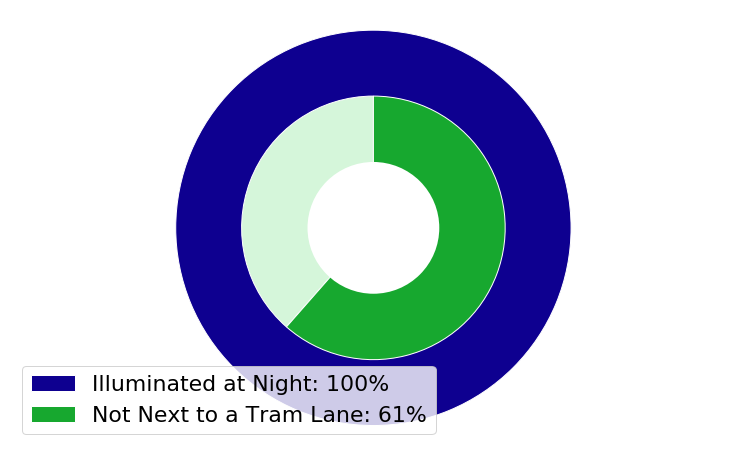

No_Tram_Route


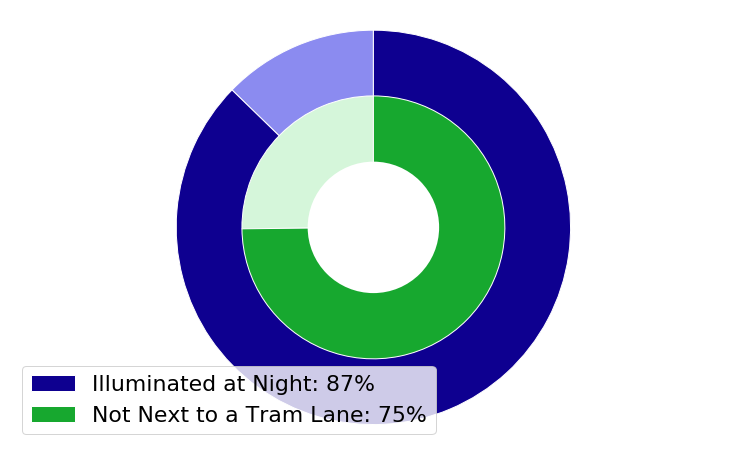

Illumination_Route


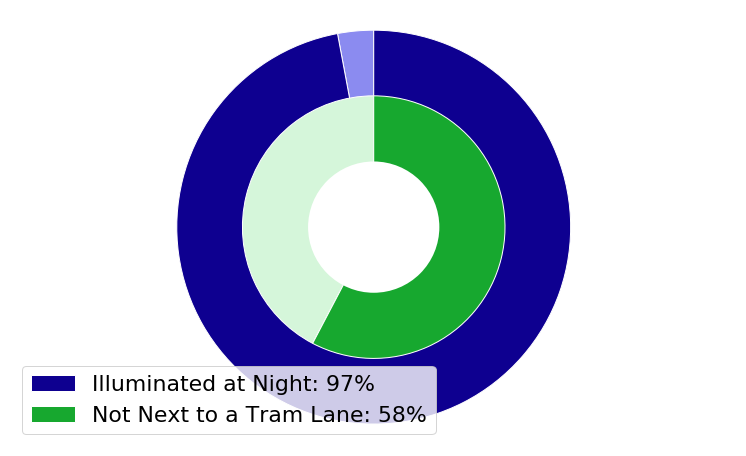

Fastest Route


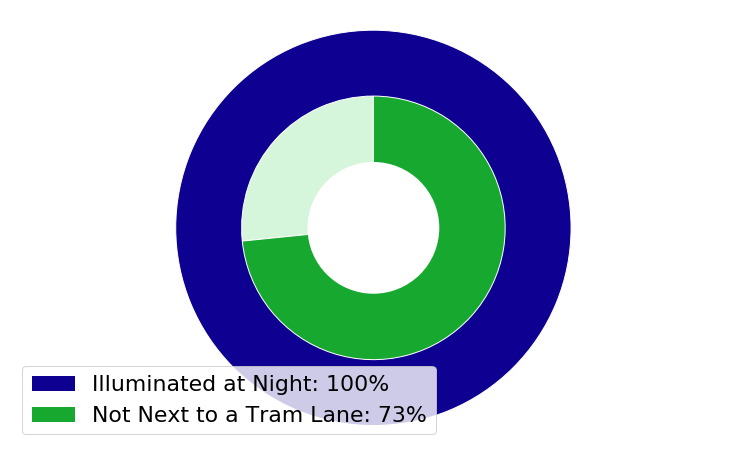

Shortest Route


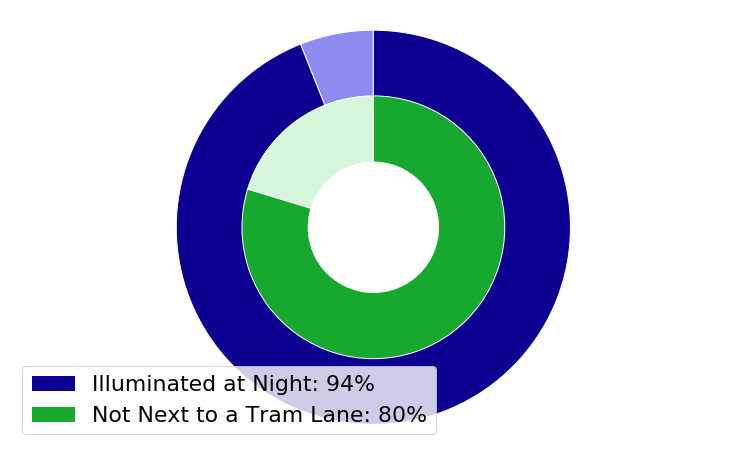

In [30]:
illuminated_label = "Illuminated at Night"
no_tram_label = "Not Next to a Tram Lane"

illu_pos = 6
tram_pos = 4
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

for route, name in [(route_json, "Basic_Dummy_Route"), 
                    (notram_route_json, "No_Tram_Route"), 
                    (illumination_route_json, "Illumination_Route"),
                    (fastest_route_json,"Fastest Route"),
                    (shortest_route_json, "Shortest Route")]:
    plt.figure(figsize=(13,8))
    
    #Calculate Distances
    distances = [euclid_distance(p1, p2) for p1, p2 in zip(route['coordinates'], 
                                                            route['coordinates'][1:])]
    
    #Calculate Boolean Array of Intersections 
    illu_intersect = [any(isApproxSamePoint(route_point, illuminate_point,
                                                     long_epsilon = 0.00075, lat_epsilon = 0.00075)
     for illuminate_point in illumination_coordinates) 
     for route_point in route['coordinates'][1:]]

    tram_intersect = [any(isApproxSamePoint(route_point, tram_point,
                                                     long_epsilon = 0.0005, lat_epsilon = 0.0005)
     for tram_point in tram_coordinates) 
     for route_point in route['coordinates'][1:]]
    
    #Now sum the distances of both the intersecting parts and the non-intersecting parts
    illu_intersect_sum = sum([val for val, doesIntersect in zip(distances, illu_intersect) if doesIntersect])
    illu_non_intersect_sum = sum([val for val, doesIntersect in zip(distances, illu_intersect) if not doesIntersect])
    
    tram_intersect_sum = sum([val for val, doesIntersect in zip(distances, tram_intersect) if doesIntersect])
    tram_non_intersect_sum = sum([val for val, doesIntersect in zip(distances, tram_intersect) if not doesIntersect])
      

    print(name)
    patch1, text1 = plt.pie([illu_non_intersect_sum, illu_intersect_sum],
           radius = illu_pos, startangle = 90, colors = ['#8B8BF0', '#0E0090'],
            wedgeprops={"edgecolor": "white", 'linewidth': 1}
           )
    patch2, text2 = plt.pie([tram_intersect_sum, tram_non_intersect_sum],
           radius = tram_pos, startangle = 90, colors = ['#d5f6da', '#17A82F'],
            wedgeprops={"edgecolor": "white", 'linewidth': 1}
           )
    labels = ["{}: {:.0f}%".format(illuminated_label, illu_intersect_sum/(illu_intersect_sum+illu_non_intersect_sum) * 100),
              "{}: {:.0f}%".format(no_tram_label,tram_non_intersect_sum/(tram_non_intersect_sum+tram_intersect_sum) * 100)]
    plt.legend([patch1[1], patch2[1]], labels, loc='best', prop={'size':22})
    plt.axis("equal")
    circle = plt.Circle(xy=(0, 0), radius=2, facecolor='white')
    plt.gca().add_artist(circle)
    plt.savefig("figures/{}_piechart.png".format(name))
    plt.show()